<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Receitas_Realizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Receitas realizadas: valores que de fato chegam aos cofres públicos.](https://www.portaltransparencia.gov.br/entenda-a-gestao-publica/execucao-receita-publica#:~:text=A%20Receita%20Realizada%20representa%20quanto,para%20uso%20pelo%20Governo%20Federal.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data = data[['Município', 'Codigo_IBGE', 'Receitas Realizadas']]
data.head()

,Município,Codigo_IBGE,Receitas Realizadas
0,ADAMANTINA,3500105,"16,071,867,925"
1,ADOLFO,3500204,"2,733,374,731"
2,AGUAÍ,3500303,"8,409,476,006"
3,ÁGUAS DA PRATA,3500402,"2,939,024,814"
4,ÁGUAS DE LINDÓIA,3500501,"8,694,922,213"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Município            645 non-null    object
 1   Codigo_IBGE          645 non-null    int64 
 2   Receitas Realizadas  645 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


###Convertendo as receitas realizadas para ```float64```
Comparando com os dados do IBGE Cidades, vemos que a conversão deve ser feita retirando as vírgulas e dividindo o valor por 100 (os últimos 2 dígitos correspondem aos centavos).
* Exemplo: Adamantina - SP possui o total de receitas realizadas de R\$ 160.718,68 (x1000) = R\$ 160.718.679,25
* Exemplo: Adolfo - SP possui o total de receitas realizadas de R\$ 27.333,75 (x1000) = R\$ 27.333.747,31

In [ ]:
def receitas_toFloat(x):
  num = x.replace(',','')
  num = float(num)
  num /= 100
  return num
data['Receitas Realizadas'] = data['Receitas Realizadas'].apply(receitas_toFloat)
data.head()

,Município,Codigo_IBGE,Receitas Realizadas
0,ADAMANTINA,3500105,1.607187e+08
1,ADOLFO,3500204,2.733375e+07
2,AGUAÍ,3500303,8.409476e+07
3,ÁGUAS DA PRATA,3500402,2.939025e+07
4,ÁGUAS DE LINDÓIA,3500501,8.694922e+07


##Discretização por quartis

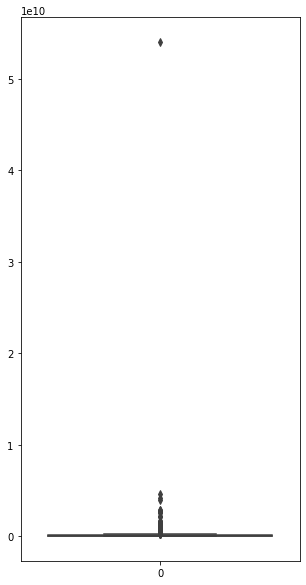

In [ ]:
# estudando a distribuição
plt.figure(figsize=(5, 10))
sns.boxplot(data=data['Receitas Realizadas'])

Vamos tentar estudar a distribuição sem os outliers (destoantes em mais de 1.5x a zona interquadrantes).

In [ ]:
IQR = data['Receitas Realizadas'].quantile(.75) - data['Receitas Realizadas'].quantile(.25)
inf = data['Receitas Realizadas'].quantile(.25) - 1.5*IQR # não será utilizado para verificação (todos os valores são positivos, então nada seria excluído por este filtro)
sup = data['Receitas Realizadas'].quantile(.75) + 1.5*IQR
print(f'IQR = {IQR} | inf = {inf} | sup = {sup}')

IQR = 91734398.34 | inf = -116980307.82 | sup = 249957285.54


In [ ]:
data[data['Receitas Realizadas'] > sup]

,Município,Codigo_IBGE,Receitas Realizadas
21,AMPARO,3501905,2.622997e+08
31,ARAÇATUBA,3502804,5.240961e+08
36,ARARAQUARA,3503208,8.131947e+08
44,ARUJÁ,3503901,2.852782e+08
46,ASSIS,3504008,3.547520e+08
...,...,...,...
629,VALINHOS,3556206,5.512233e+08
634,VÁRZEA PAULISTA,3556503,2.788856e+08
636,VINHEDO,3556701,4.685124e+08
640,VOTORANTIM,3557006,3.669247e+08


In [ ]:
data[data['Receitas Realizadas'] > sup].index # índices dos outliers para drop

Int64Index([ 21,  31,  36,  44,  46,  47,  51,  62,  64,  67,  71,  73,  85,
             86, 101, 103, 108, 120, 121, 126, 144, 149, 167, 180, 185, 186,
            187, 208, 211, 212, 217, 232, 235, 254, 255, 256, 258, 264, 267,
            272, 273, 276, 277, 280, 286, 293, 301, 302, 303, 308, 320, 326,
            330, 343, 344, 345, 387, 410, 433, 444, 459, 464, 486, 487, 492,
            507, 513, 528, 534, 542, 544, 545, 546, 548, 556, 557, 562, 565,
            566, 569, 576, 581, 583, 584, 588, 603, 604, 621, 629, 634, 636,
            640, 641],
           dtype='int64')

In [ ]:
semOutliers = data.drop(data[data['Receitas Realizadas'] > sup].index)
semOutliers.reset_index(inplace=True, drop=True)
semOutliers

,Município,Codigo_IBGE,Receitas Realizadas
0,ADAMANTINA,3500105,1.607187e+08
1,ADOLFO,3500204,2.733375e+07
2,AGUAÍ,3500303,8.409476e+07
3,ÁGUAS DA PRATA,3500402,2.939025e+07
4,ÁGUAS DE LINDÓIA,3500501,8.694922e+07
...,...,...,...
547,VISTA ALEGRE DO ALTO,3556909,3.751317e+07
548,VITÓRIA BRASIL,3556958,1.349809e+07
549,ZACARIAS,3557154,2.474475e+07
550,CHAVANTES,3557204,3.853802e+07


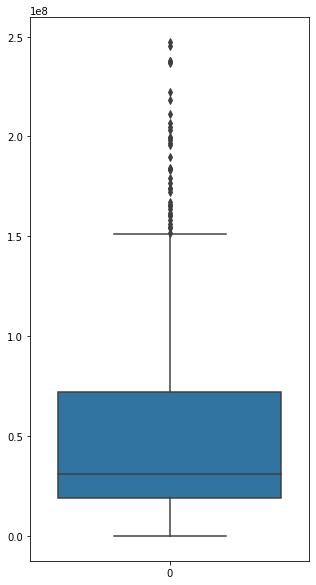

In [ ]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=semOutliers['Receitas Realizadas'])

Vamos discretizar a distribuição assim:
* Primeiro quartil (semOutliers): Muito Baixo
* Segundo quartil (semOutliers): Baixo
* Terceiro quartil (semOutliers): Médio
* Terceiro quartil ao superior (semOutliers): Alto
* Outliers (tanto do df "semOutliers" quanto do df completo): Muito Alto

In [ ]:
sup_semOutliers = semOutliers['Receitas Realizadas'].quantile(.75) + 1.5*(semOutliers['Receitas Realizadas'].quantile(.75) - semOutliers['Receitas Realizadas'].quantile(.25))

In [ ]:
bins = [0, semOutliers['Receitas Realizadas'].quantile(.25), semOutliers['Receitas Realizadas'].quantile(.5), semOutliers['Receitas Realizadas'].quantile(.75), sup_semOutliers, data['Receitas Realizadas'].max()]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação por Receitas Realizadas'] = pd.cut(data['Receitas Realizadas'], labels=labels, bins=bins)
data.head()

,Município,Codigo_IBGE,Receitas Realizadas,Classificação por Receitas Realizadas
0,ADAMANTINA,3500105,1.607187e+08,Muito Alto
1,ADOLFO,3500204,2.733375e+07,Baixo
2,AGUAÍ,3500303,8.409476e+07,Alto
3,ÁGUAS DA PRATA,3500402,2.939025e+07,Baixo
4,ÁGUAS DE LINDÓIA,3500501,8.694922e+07,Alto


###Histograma da distribuição

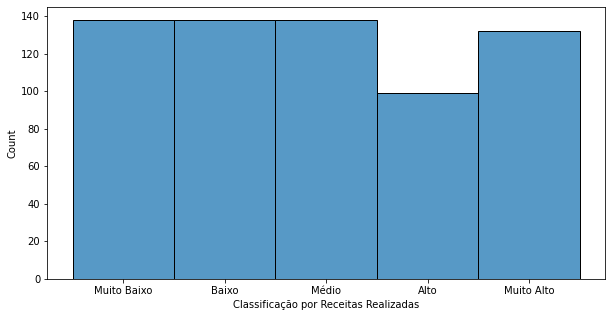

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data['Classificação por Receitas Realizadas'])

##Discretização proposta no mapa do IBGE Cidades (estado de SP)

In [ ]:
data.drop(axis=1, labels=['Classificação por Receitas Realizadas'], inplace=True)

In [ ]:
data.head()

,Município,Codigo_IBGE,Receitas Realizadas
0,ADAMANTINA,3500105,1.607187e+08
1,ADOLFO,3500204,2.733375e+07
2,AGUAÍ,3500303,8.409476e+07
3,ÁGUAS DA PRATA,3500402,2.939025e+07
4,ÁGUAS DE LINDÓIA,3500501,8.694922e+07


In [ ]:
bins = [0, 1000*23361.00, 1000*44646.06, 1000*131255.01, data['Receitas Realizadas'].max()]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação por Receitas Realizadas'] = pd.cut(data['Receitas Realizadas'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Receitas Realizadas,Classificação por Receitas Realizadas
0,ADAMANTINA,3500105,1.607187e+08,Muito Alto
1,ADOLFO,3500204,2.733375e+07,Médio
2,AGUAÍ,3500303,8.409476e+07,Alto
3,ÁGUAS DA PRATA,3500402,2.939025e+07,Médio
4,ÁGUAS DE LINDÓIA,3500501,8.694922e+07,Alto
...,...,...,...,...
640,VOTORANTIM,3557006,3.669247e+08,Muito Alto
641,VOTUPORANGA,3557105,3.034535e+08,Muito Alto
642,ZACARIAS,3557154,2.474475e+07,Médio
643,CHAVANTES,3557204,3.853802e+07,Médio


###Histograma da distribuição

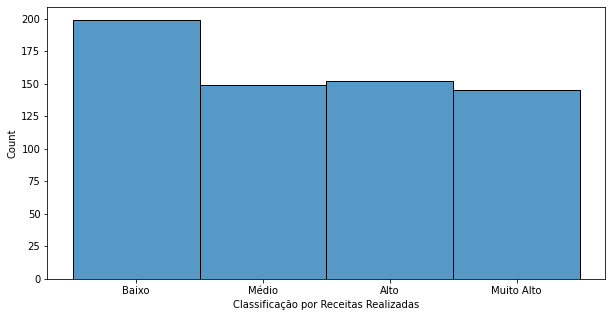

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data['Classificação por Receitas Realizadas'])